# Data Science Challenge

In [1]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

import sys
!{sys.executable} -m pip install <package list>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `/opt/conda/bin/python -m pip install <package list>'


In [3]:
#Libraries
import pandas as pd, numpy as np
pd.set_option("display.max_columns", 101)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

## Data Description

Column | Description
:---|:---
`id` | Unique id
`Daily Time Spent on Site` | Consumer time spent on site (in minutes)
`Age` | Consumer age (in years)
`Area Income` | Avg. Income of geographical area of consumer (in US $$)
`Daily Internet Usage` | Avg. minutes a day consumer is on the internet
`Ad Topic Line` | Headline of the advertisement
`gender` | Gender of the consumer
`Country` | Country of consumer
`Timestamp` | Timestamp at which consumer clicked on Ad or closed window (YYYY-MM-DD HH:MM:SS)
`Clicked` | Whether a consumer clicked on the advert or not (0: No ,1: Yes)

## Data Wrangling & Visualization

In [5]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [6]:
data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0
1,1201,2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0
2,1202,2016-01-01 05:31:22,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0
3,1203,2016-01-01 08:27:06,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0
4,1204,2016-01-01 15:14:24,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1


In [7]:
#Explore columns
data.columns

Index(['id', 'Timestamp', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'gender', 'Country',
       'Clicked'],
      dtype='object')

In [8]:
#Description
data.describe()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked
count,1000.000000,1000.000000,1000.000000,775.000000,1000.000000,1000.000000,1000.000000
mean,1699.500000,65.120650,35.816000,55343.014555,179.592310,0.474000,0.503000
std,288.819436,15.781456,8.782669,13182.578667,43.735785,0.499573,0.500241
min,1200.000000,32.600000,19.000000,14548.060000,105.000000,0.000000,0.000000
25%,1449.750000,51.450000,29.000000,48270.620000,137.885000,0.000000,0.000000
50%,1699.500000,68.390000,35.000000,57737.510000,182.425000,0.000000,1.000000
75%,1949.250000,78.572500,41.250000,65207.185000,217.707500,1.000000,1.000000
max,2199.000000,91.370000,61.000000,79484.800000,269.960000,1.000000,1.000000


## Visualization, Modeling, Machine Learning

Predict which users might click a particular advertisement.
Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on the basis of accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [10]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country
0,2200,2016-06-04 17:24:07,43.88,54,31523.09,166.85,Enhanced methodical database,1,Somalia
1,2201,2016-06-05 00:29:13,66.40,40,77567.85,214.42,Digitized heuristic solution,0,Antigua and Barbuda
2,2202,2016-06-05 00:29:13,79.52,34,NaN,141.58,Customer-focused 24/7 concept,0,United States of America
3,2203,2016-06-05 07:54:30,52.35,25,33293.78,147.61,Mandatory 4thgeneration structure,1,Mali
4,2204,2016-06-05 07:54:30,81.51,36,NaN,195.93,Monitored local Internet solution,0,Croatia


In [22]:
total_missing = data.isnull().sum().sort_values(ascending=False)
percent_missing = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Area Income,225,0.225
Clicked,0,0.000
Country,0,0.000
gender,0,0.000
Ad Topic Line,0,0.000
Daily Internet Usage,0,0.000
Age,0,0.000
Daily Time Spent on Site,0,0.000
Timestamp,0,0.000
id,0,0.000


In [ ]:
# not too many missing data to be worried about



**Describe the most important features in the model to a management audience.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


These are the significant features: Timestamp, Daily Time Spent on Site, Age, Area Income, gender, Country, Clicked


> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict whether a consumer clicked on an ad or not. Submit a CSV file with a header row and one row per test entry. 
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **Clicked**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a8ee80910>,
      dtype=object)

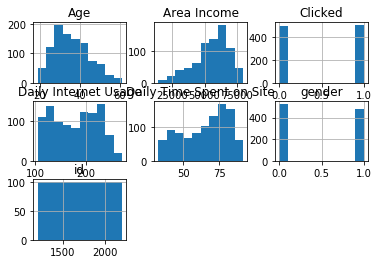

In [13]:
data.hist()

Age: is skewed to left, indicating younger individuals are active than older.
Area Income: Skewed to right, indicating higher income related to activity

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

In [14]:
data.describe()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked
count,1000.000000,1000.000000,1000.000000,775.000000,1000.000000,1000.000000,1000.000000
mean,1699.500000,65.120650,35.816000,55343.014555,179.592310,0.474000,0.503000
std,288.819436,15.781456,8.782669,13182.578667,43.735785,0.499573,0.500241
min,1200.000000,32.600000,19.000000,14548.060000,105.000000,0.000000,0.000000
25%,1449.750000,51.450000,29.000000,48270.620000,137.885000,0.000000,0.000000
50%,1699.500000,68.390000,35.000000,57737.510000,182.425000,0.000000,1.000000
75%,1949.250000,78.572500,41.250000,65207.185000,217.707500,1.000000,1.000000
max,2199.000000,91.370000,61.000000,79484.800000,269.960000,1.000000,1.000000


In [16]:
clean_data =data.dropna()

In [18]:
clean_data.head(2)

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0
1,1201,2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0


In [25]:
# label encoding - is the simplest way to encode categorical values
# create a new column with labeled Gender category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_gender = data["gender"]=le.fit_transform(data.gender)

In [37]:
import statsmodels.api as sm

In [39]:
# Y is the target variable
Y = clean_data["Clicked"]


In [40]:
# X is the feature
X = clean_data[['id','Timestamp', 'Daily Time Spent on Site', 'Age', "Area Income", "Daily Internet Usage", "gender"]]


In [41]:
# add train & test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


The number of observations in training set is 620
The number of observations in test set is 155


In [45]:
# Let's train the model!
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
#print(results.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [48]:
clean_data(Y)

TypeError: 'DataFrame' object is not callable

In [49]:
Y = clean_data["Clicked"].head()

In [54]:
clicked_col = print(Y)

0    0
1    0
2    0
3    0
4    1
Name: Clicked, dtype: int64


In [53]:
submission_df = clean_data["id"]

In [62]:
submission_df = [clean_data["id"],["clicked_col"]]

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---